<a href="https://colab.research.google.com/github/mandar-solanki/Regression-Methods-exercises/blob/main/Exercise_D3A_1219_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Current working directoty
import os
print(os.getcwd())

/content


In [2]:
!unzip /content/flights.zip

Archive:  /content/flights.zip
  inflating: flights.csv             


In [3]:
import pandas as pd

# load the training dataset
bike_data = pd.read_csv('/content/flights.csv')
bike_data.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [4]:
bike_data.dtypes


,0
Year,int64
Month,int64
DayofMonth,int64
DayOfWeek,int64
Carrier,object
OriginAirportID,int64
OriginAirportName,object
OriginCity,object
OriginState,object
DestAirportID,int64


In [5]:
numeric_features = ['CRSDepTime', 'CRSArrTime', 'ArrDelay', 'DepDelay']
bike_data[numeric_features].describe()


,CRSDepTime,CRSArrTime,ArrDelay,DepDelay
count,271940.000000,271940.000000,271940.000000,271940.000000
mean,1325.498713,1505.477819,6.496650,10.350449
std,470.748546,493.204020,38.230331,35.673710
min,1.000000,1.000000,-75.000000,-63.000000
25%,920.000000,1119.000000,-11.000000,-4.000000
50%,1320.000000,1529.000000,-3.000000,-1.000000
75%,1725.000000,1918.000000,10.000000,9.000000
max,2359.000000,2359.000000,1440.000000,1425.000000


### Histograms
DepDelay
ArrDelay
CRSDepTime
CRSArrTime



In [6]:
import matplotlib.pyplot as plt


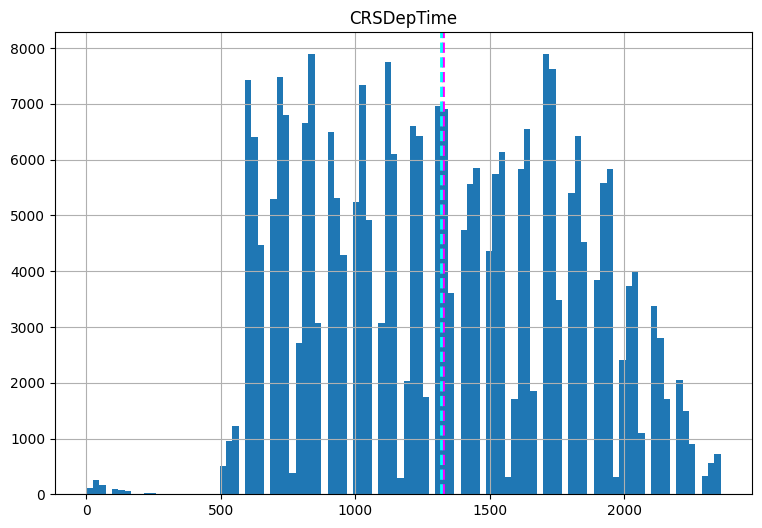

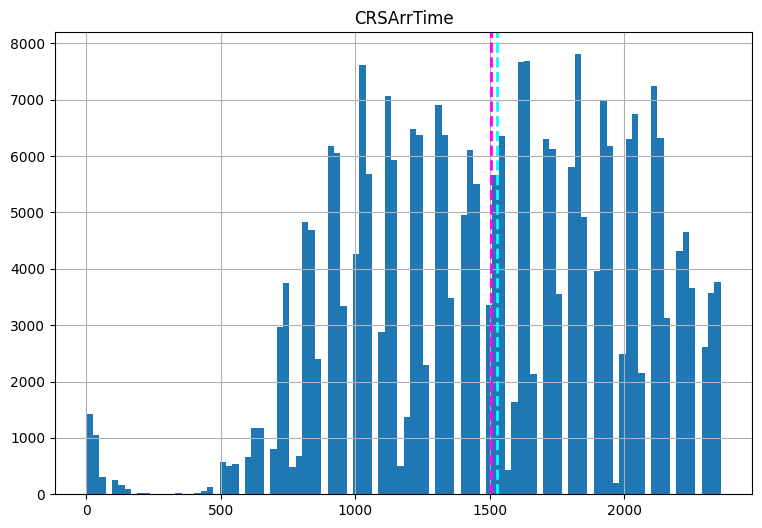

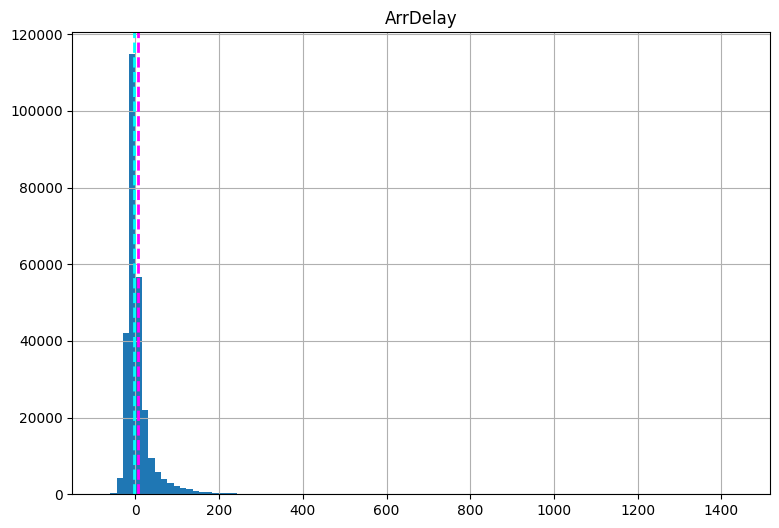

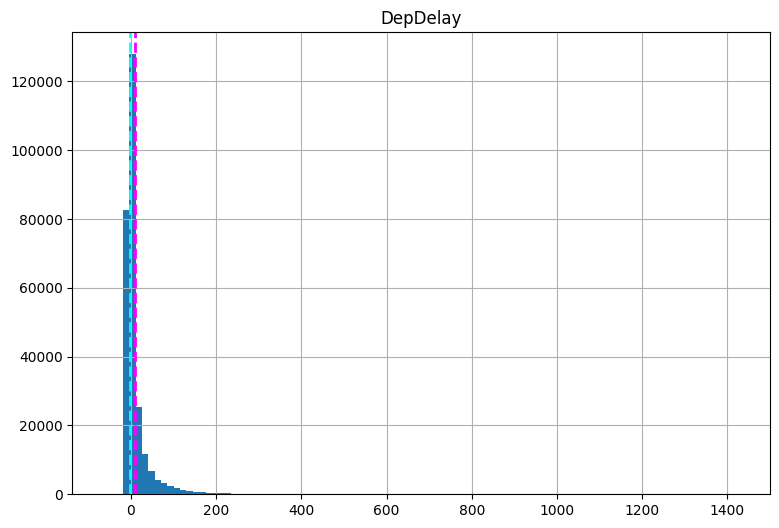

In [7]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()


### Box Plots

DepDelay by Carrier, DayOfWeek

ArrDelay by OriginState, DestState


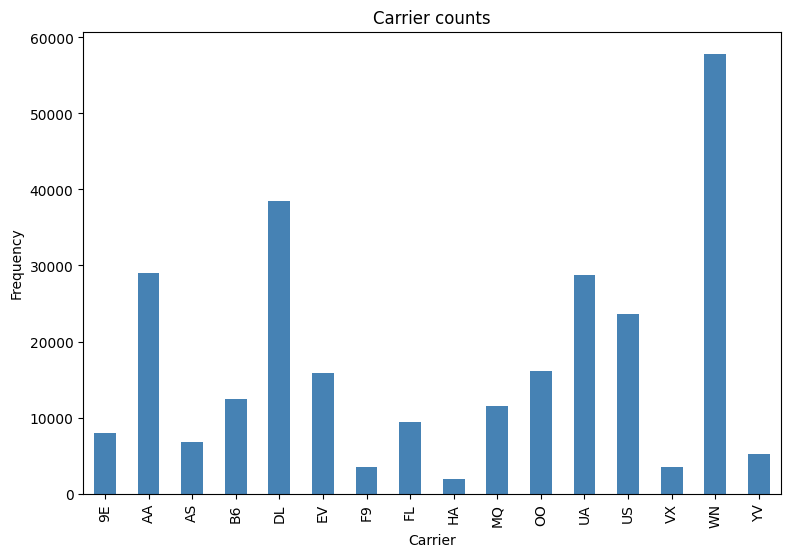

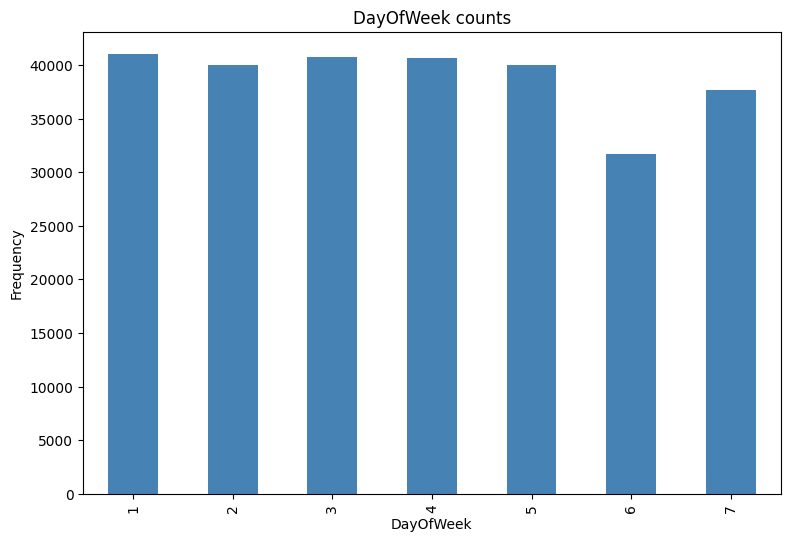

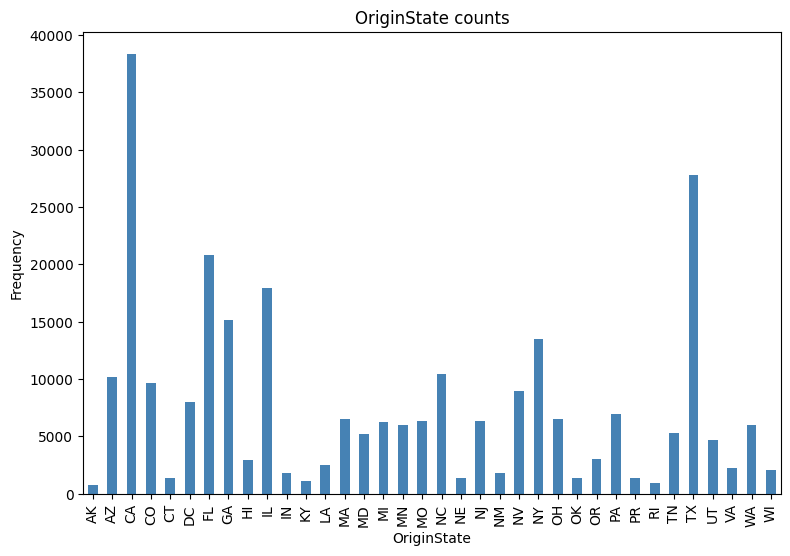

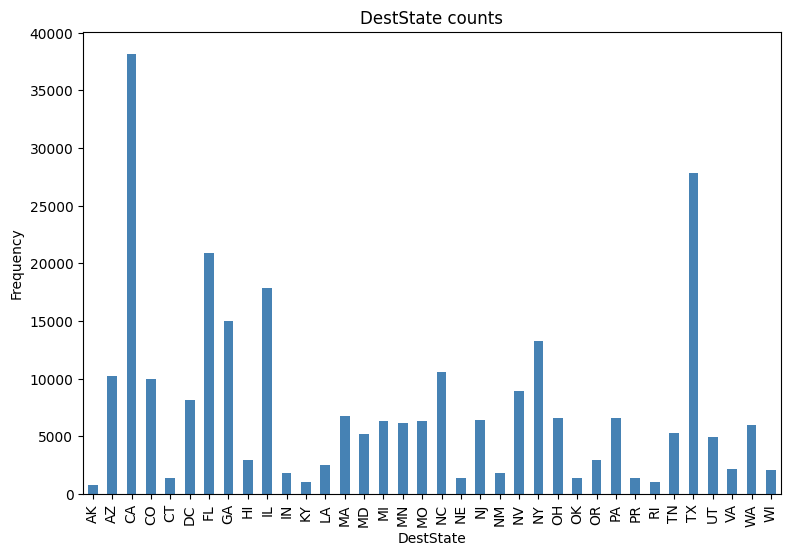

In [8]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features1 = ['Carrier','DayOfWeek']
categorical_features2 = ['OriginState','DestState']

for col in categorical_features1+categorical_features2:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()


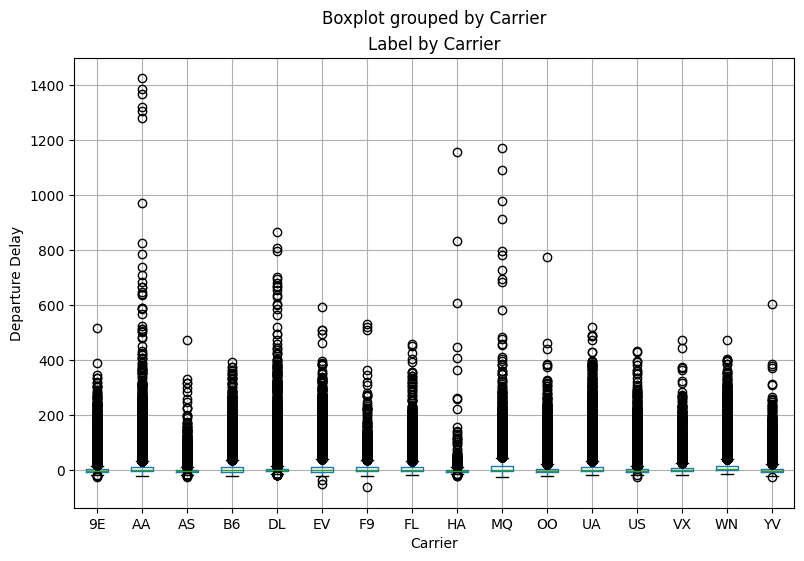

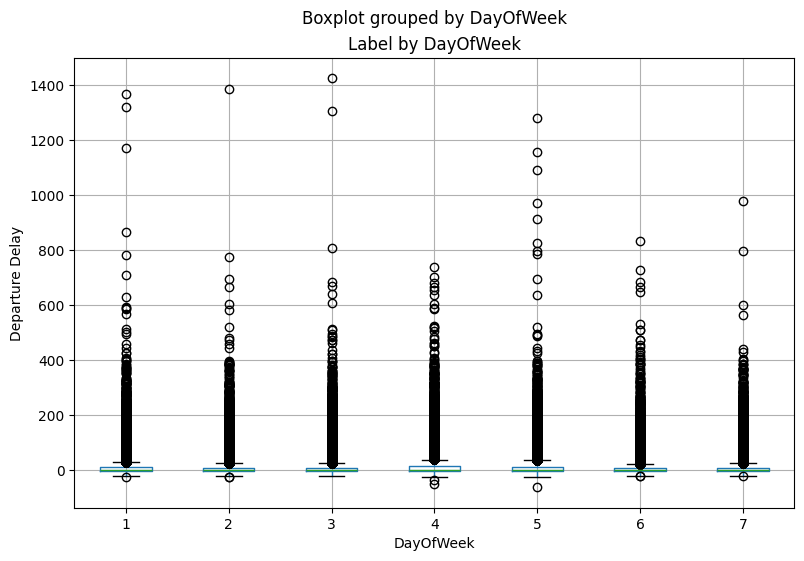

In [9]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features1:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'DepDelay', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Departure Delay")
plt.show()


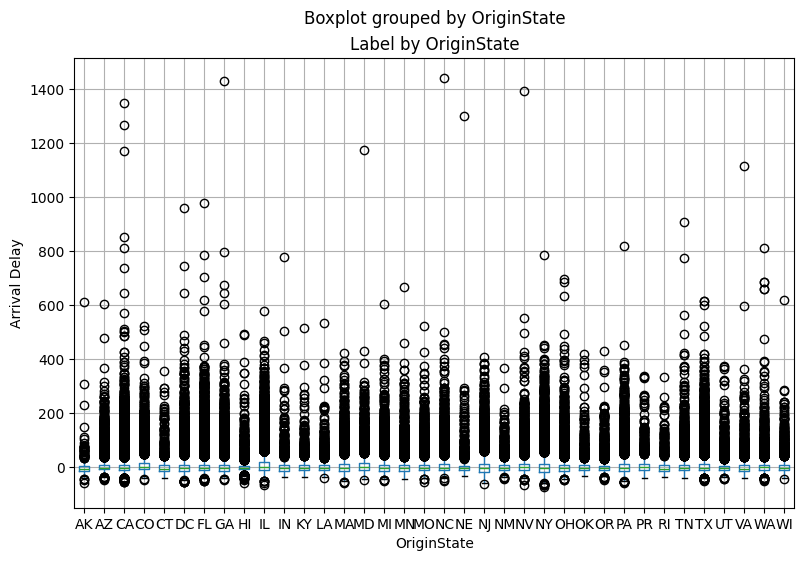

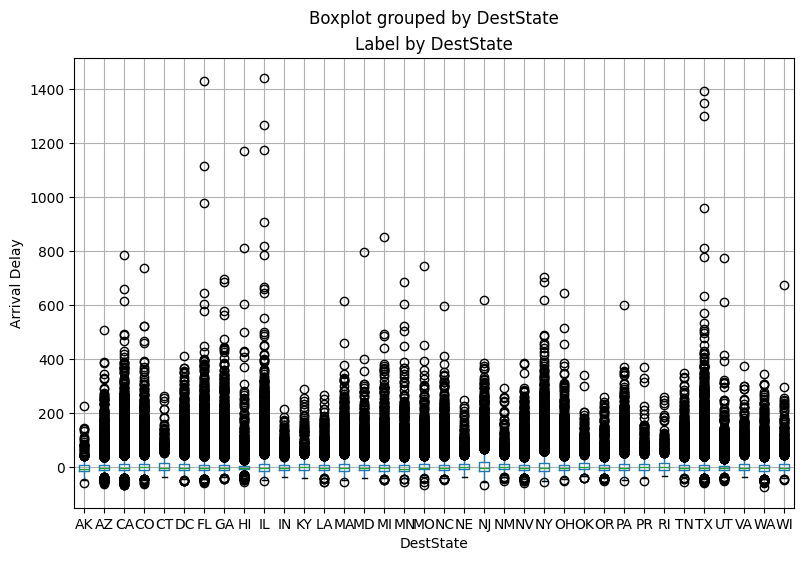

In [10]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features2:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'ArrDelay', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Arrival Delay")
plt.show()


### Regression

y = DepDelay

X = [Carrier, CRSDepTime, OriginState, DestState]


In [11]:
model_X = bike_data[['Carrier','CRSDepTime','OriginState','DestState']]
model_y = bike_data['DepDelay']


In [12]:
model_X = pd.get_dummies(data=model_X, drop_first=True)


In [13]:
# Separate features and labels
# X, y = bike_data[['Carrier','CRSDepTime','OriginState','DestState']].values, bike_data['DepDelay'].values
X = model_X.values
y = model_y.values
#y = (model_y.values - model_y.values.mean()) / (model_y.values.max() - model_y.values.min())

print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')


Features:
[[1539 False False False True False False False False False False False
  False False False False False False False False False True False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False True False False False False False False False False False False
  False False]
 [710 False False False False False False False False False False False
  False False True False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False True False False False False False
  False False False False False False False False False False False True
  False False False False False False False False False False False False
  False False False Fa

In [14]:
from sklearn.model_selection import train_test_split

# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print ('Training Set: %d data\nTest Set: %d data' % (X_train.shape[0], X_test.shape[0]))


Training Set: 190358 data
Test Set: 81582 data


In [15]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(190358, 86)
(81582, 86)
(190358,)
(81582,)


In [16]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set

model = LinearRegression().fit(X_train, y_train)

model = LinearRegression().fit(X_train, y_train)
print (model)


LinearRegression()


In [17]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])


Predicted labels:  [-3.  9. 13.  5. 10. -0.  4. 13. 15. 25.]
Actual labels   :  [ 88  -5  11  -6   2  -4  -1   3  -6 358]


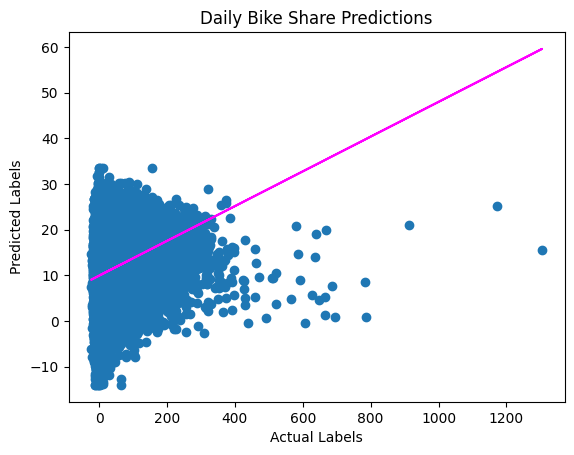

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 1217.622341179285
RMSE: 34.89444570672079
R2: 0.039752842962924584


### Lasso

Lasso() 

MSE: 1234.9291808046994
RMSE: 35.14155916866381
R2: 0.026104240284112734


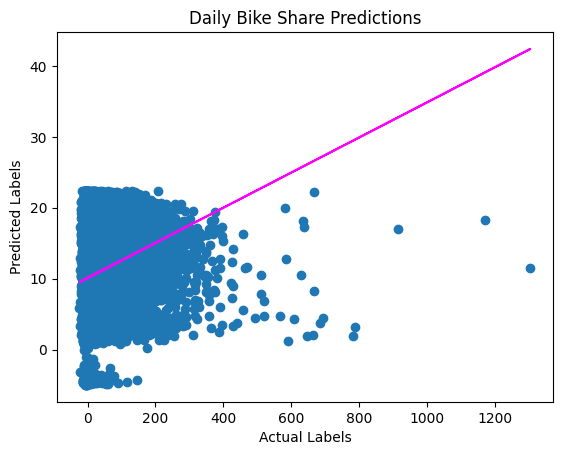

In [20]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


### Decision Tree Regressor


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)


DecisionTreeRegressor() 

|--- feature_0 <= 1309.50
|   |--- feature_0 <= 900.50
|   |   |--- feature_0 <= 715.50
|   |   |   |--- feature_0 <= 451.50
|   |   |   |   |--- feature_73 <= 0.50
|   |   |   |   |   |--- feature_81 <= 0.50
|   |   |   |   |   |   |--- feature_58 <= 0.50
|   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 270.00
|   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 22
|   |   |   |   |   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_52 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_52 >  0.50

MSE: 1574.460882616754
RMSE: 39.67947684404059
R2: -0.2416588750618296


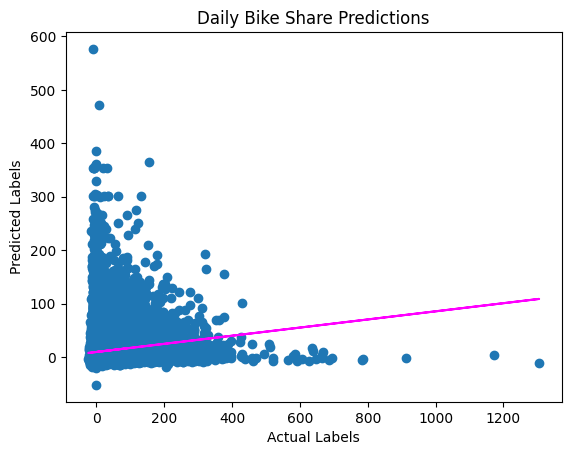

In [22]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


### Random Forest Regressor

RandomForestRegressor() 

MSE: 1434.3814089872108
RMSE: 37.873228130002474
R2: -0.13118873028628042


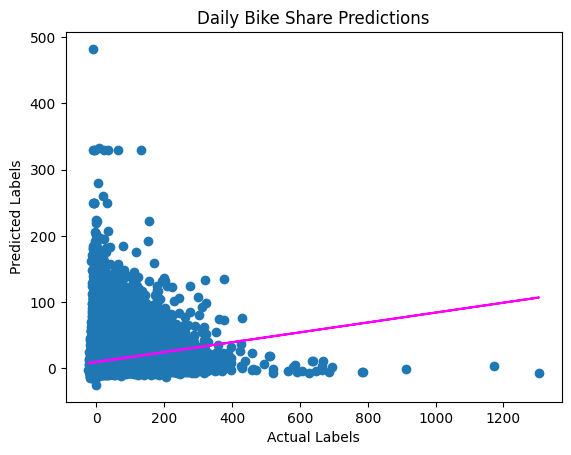

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


### Gradient Boosting Regressor

GradientBoostingRegressor() 

MSE: 1210.5801678073656
RMSE: 34.79339258835456
R2: 0.04530647542436472


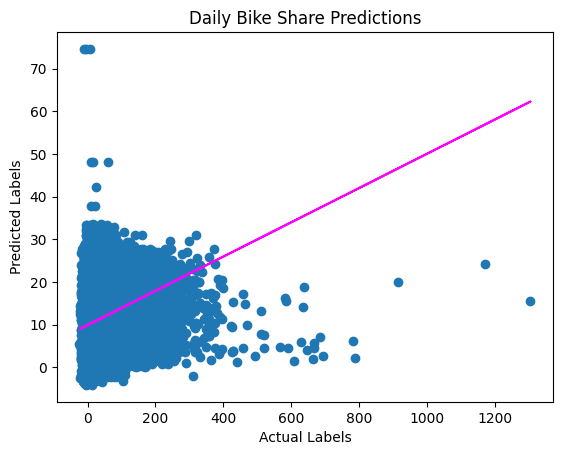

In [24]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


Hyper parameter tuning through GridSearchCV

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 1208.7739313145403
RMSE: 34.76742629695992
R2: 0.04673091829019804


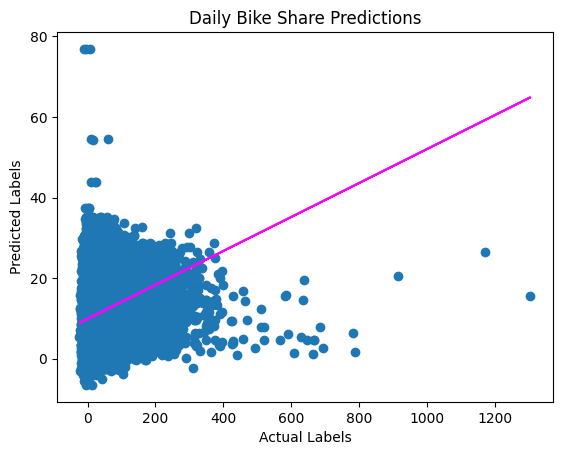

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


## END